In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import skfmm

In [2]:
def my_gradient(x):
    N = x.shape[-1]
    h = 1 / (N - 1)      
    center_kernel = 1/(2*h)*torch.tensor([[[[0, 0, 0], 
                                        [-1, 0, 1],
                                        [0, 0, 0]]]])
                                                 
    dx_center = F.conv2d(x, center_kernel.to(x.device, x.dtype))
    dy_center = F.conv2d(x, center_kernel.transpose(2, 3).to(x.device, x.dtype))
    Tx = F.pad(dx_center, (1, 1, 1, 1), 'reflect')
    Ty = F.pad(dy_center, (1, 1, 1, 1), 'reflect')

    lap_kernel= -1/(h**2)*torch.tensor([[[[0, -1, 0], 
                                        [-1, 4, -1],
                                        [0, -1, 0]]]])
    
    LT = F.conv2d(x, lap_kernel.to(x.device, x.dtype))
    LT = F.pad(LT, (1, 1, 1, 1), 'reflect')
    return Tx, Ty, LT

In [3]:
data = np.load('cifar.npy')
kappa = data[2,0]
N = kappa.shape[-1]
vel = 1/kappa
src = [N//2, N//2]

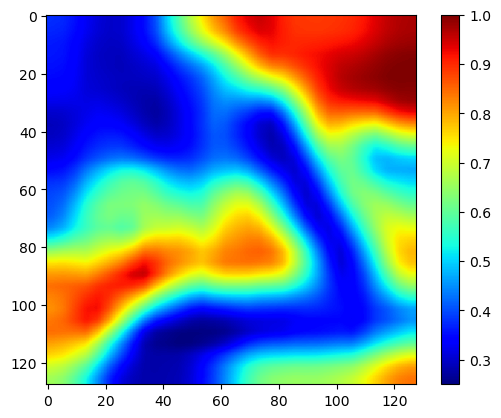

In [4]:
plt.imshow(kappa, cmap='jet')
plt.colorbar()

In [5]:
phi = np.ones_like(vel)
phi[src[0], src[1]] = -1
Nx, Ny = kappa.shape[-2:]
dx, dy = 1 / Nx, 1 / Ny
T = skfmm.travel_time(phi,vel,dx=(dx, dy),order=2)

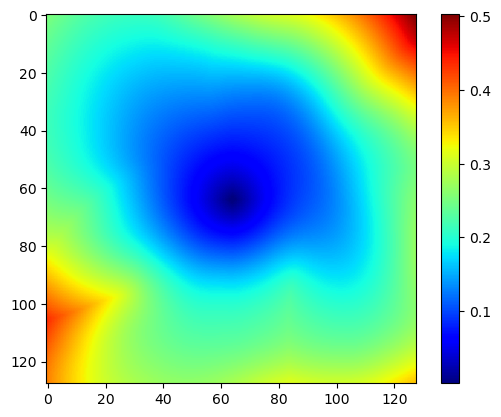

In [6]:
plt.imshow(T, cmap='jet')
plt.colorbar()

In [7]:
T = torch.from_numpy(T)
Tx, Ty, LT = my_gradient(T.unsqueeze(0).unsqueeze(0))

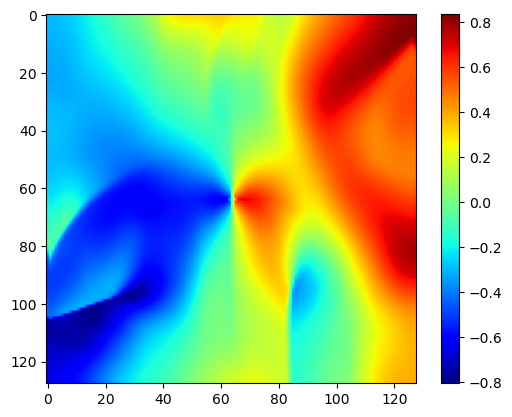

In [8]:
plt.imshow(Tx[0,0], cmap='jet')
plt.colorbar()

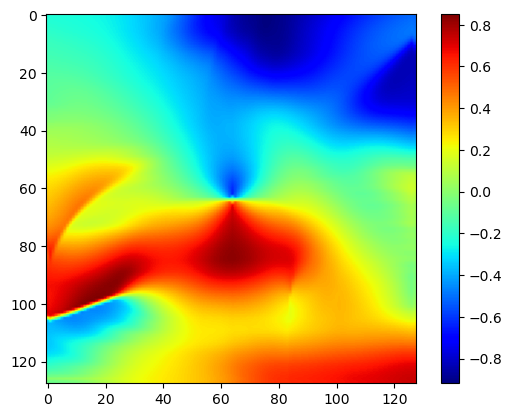

In [9]:
plt.imshow(Ty[0,0], cmap='jet')
plt.colorbar()

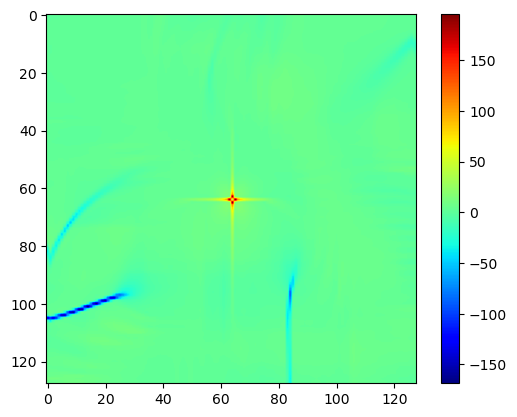

In [10]:
plt.imshow(LT[0,0], cmap='jet')
plt.colorbar()